<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

## Fase 1: Unión de Conjuntos de Datos

1. **Lectura y Exploración Inicial:**

   - Cargar los diferentes archivos CSV en dataframes individuales.

   - Explorar la estructura de cada archivo para asegurarse de que las columnas sean consistentes y tengan un formato homogéneo.

2. **Estandarización y Limpieza:**

   - Estandarizar nombres de columnas si es necesario.

   - Asegurar que los tipos de datos (fechas, valores monetarios) sean consistentes en todos los archivos.

   - Tratar los valores nulos y eliminar filas o columnas irrelevantes.

3. **Unión de los Dataframes:**

   - Unir los dataframes de todos los archivos para crear un solo dataframe consolidado.

   - Verificar la existencia de duplicados y corregir cualquier inconsistencia en los datos.

In [98]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Para gestión de fechas
# -----------------------------------------------------------------------
from datetime import datetime

# Funciones src
from src import soporte_limpieza as sl

In [99]:
# 1. Lectura y exploración inicial
df_datos_2013 = pd.read_csv("datos/datos-2013.csv", sep= ";", encoding= "latin-1")
df_datos_2014 = pd.read_csv("datos/datos-2014.csv", sep= ";", encoding= "latin-1")
df_datos_2015 = pd.read_csv("datos/datos-2015.csv", sep= ";", encoding= "latin-1")
df_datos_2016 = pd.read_csv("datos/datos-2016.csv", sep= ";", encoding= "latin-1")
df_datos_2017 = pd.read_csv("datos/datos-2017.csv", sep= ";", encoding= "latin-1")
df_datos_2018 = pd.read_csv("datos/datos-2018.csv", sep= ";", encoding= "latin-1")
df_datos_2019 = pd.read_csv("datos/datos-2019.csv", sep= ";", encoding= "latin-1")
df_datos_2020 = pd.read_csv("datos/datos-2020.csv", sep= ";", encoding= "latin-1")
df_datos_2021 = pd.read_csv("datos/datos-2021.csv", sep= ";", encoding= "latin-1")

In [100]:
# 1. Lectura y exploración inicial
df_datos_2013.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013


In [101]:
# 1. Lectura y exploración inicial
df_datos_2013.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

Voy a traducir las columnas que están en portugués al español para poder entenderlas mejor.

In [102]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2013.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2013.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [103]:
# 1. Lectura y exploración inicial
df_datos_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4498 entries, 0 to 4497
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   4498 non-null   int64 
 1   NOMBRE ORGANISMO SUPERIOR   4498 non-null   object
 2   CÓDIGO ORGANISMO            4498 non-null   int64 
 3   NOMBRE ORGANISMO            4498 non-null   object
 4   CÓDIGO UNIDAD GESTORA       4498 non-null   int64 
 5   NOMBRE UNIDAD GESTORA       4498 non-null   object
 6   CATEGORÍA ECONÓMICA         4498 non-null   object
 7   ORIGEN INGRESO              4498 non-null   object
 8   ESPECIE INGRESO             4498 non-null   object
 9   DETALLE                     4498 non-null   object
 10  VALOR PREVISTO ACTUALIZADO  4498 non-null   object
 11  VALOR REGISTRADO            4498 non-null   object
 12  VALOR REALIZADO             4498 non-null   object
 13  PORCENTAJE REALIZADO        4498 non-null   obje

In [104]:
# 1. Lectura y exploración inicial
df_datos_2013.duplicated().sum()

np.int64(0)

In [105]:
# 1. Lectura y exploración inicial
df_datos_2013.head(2)

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013


En este DataFrame hay 16 columnas que contienen tipos de datos integer y object. No hay valores nulos ni duplicados

In [106]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis estadístico
 
df_datos_2013.describe().T

,count,mean,std,min,25%,50%,75%,max
CÓDIGO ORGANISMO SUPERIOR,4498.0,31729.657626,10691.972258,20000.0,25000.0,26000.0,36000.0,81000.0
CÓDIGO ORGANISMO,4498.0,31447.970431,10798.289531,20101.0,25916.0,26292.0,35000.0,91214.0
CÓDIGO UNIDAD GESTORA,4498.0,233059.797910,141561.057724,110005.0,153173.0,160075.0,254420.0,913001.0
AÑO EJERCICIO,4498.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0


No aporta nada este análisis.

In [107]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo
 
df_datos_2013.describe(include = "object").T

,count,unique,top,freq
NOMBRE ORGANISMO SUPERIOR,4498,25,Ministério da Educação,1833
NOMBRE ORGANISMO,4498,266,Ministério da Economia - Unidades com vínculo ...,494
NOMBRE UNIDAD GESTORA,4498,279,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,415
CATEGORÍA ECONÓMICA,4498,5,Receitas Correntes,4001
ORIGEN INGRESO,4498,15,Outras Receitas Correntes,1982
ESPECIE INGRESO,4498,44,Receita de Serviços,978
DETALLE,4498,704,RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,214
VALOR PREVISTO ACTUALIZADO,4498,2788,"0,00",1625
VALOR REGISTRADO,4498,52,"0,00",4447
VALOR REALIZADO,4498,3738,"0,00",704


En este DataFrame se puede ver que no hay valores nulos. Luego, "unique" nos indica la cantidad de valores únicos, en la cual destaca la columna VALOR REALIZADO (que son los ingresos realizados). La "freq" nos indica el valor más común en cada columna, en este caso destaca la columna "FECHA REGISTRO".

In [108]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["NOMBRE ORGANISMO SUPERIOR"].unique()

array(['Advocacia-Geral da União', 'Controladoria-Geral da União',
       'Ministério da Agricultura, Pecuária e Abastec',
       'Ministério da Cidadania',
       'Ministério da Ciência, Tecnologia, Inovações ',
       'Ministério da Defesa', 'Ministério da Economia',
       'Ministério da Educação', 'Ministério da Infraestrutura',
       'Ministério da Justiça e Segurança Pública',
       'Ministério da Mulher, Família e Direitos Huma',
       'Ministério da Pesca e Aquicultura',
       'Ministério da Previdência Social', 'Ministério da Saúde',
       'Ministério das Comunicações',
       'Ministério das Mulheres, Igualdade Racial, da',
       'Ministério das Relações Exteriores',
       'Ministério de Minas e Energia',
       'Ministério do Desenvolvimento Agrário',
       'Ministério do Desenvolvimento Regional', 'Ministério do Esporte',
       'Ministério do Meio Ambiente', 'Ministério do Trabalho e Emprego',
       'Ministério do Turismo', 'Presidência da República'], dtype=objec

In [109]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["NOMBRE ORGANISMO"].unique()

array(['Advocacia-Geral da União - Unidades com vínculo direto',
       'Controladoria-Geral da União',
       'Empresa Brasileira de Pesquisa Agropecuária',
       'Ministério da Agricultura, Pecuária e Abastecimento - Unidades com vínculo direto',
       'Companhia Nacional de Abastecimento',
       'Serviço Florestal Brasileiro',
       'Instituto Nacional de Colonização e Reforma Agrária',
       'Fundo de Defesa da Economia Cafeeira',
       'Fundo de Terras e da Reforma Agrária',
       'Ministério da Cidadania - Unidades com vínculo direto',
       'Fundo Nacional de Assistência Social',
       'Ministério da Ciência, Tecnologia, Inovações e Comunicações - Unidades com vínculo direto',
       'Conselho Nacional de Desenvolvimento Científico e Tecnológico',
       'Comissão Nacional de Energia Nuclear',
       'Fundo Nacional de Desenvolvimento Científico e Tecnológico',
       'Financiadora de Estudos e Projetos',
       'Centro Nacional de Tecnologia Eletrônica Avançada S.A.',


La columna "NOMBRE ORGANISMO SUPERIOR" tiene un nivel de detalle más amplio, y luego en la columna "NOMBRE ORGANISMO" se especifica el organismo público. 

In [110]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["NOMBRE UNIDAD GESTORA"].unique()

array(['COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU',
       'DIRETORIA DE GESTAO INTERNA/SE/CGU', 'EMBRAPA-SETORIAL',
       'COORD.-GERAL DE ORCAMENTO E FINANCAS-MAPA',
       'COMPANHIA NACIONAL DE ABASTECIMENTO',
       'SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB',
       'DPTO. DE ADMINISTRACAO FINANCEIRA-DAF - INCRA',
       'FUNDO DE DEFESA DA ECON.CAFEEIRA/FUNCAFE/SPA',
       'CREDITO FUNDIARIO',
       'COORD.GERAL DE PLAN. ORC. FIN. E CONTAB./MINC',
       'DEPARTAMENTO DE GESTAO INTERNA',
       'SETORIAL DE ORCAMENTO E FINANCAS/MC',
       'FUNDO NACIONAL DE ASSISTENCIA SOCIAL',
       'COORDENACAO-GERAL DE ORCAMENTO E FINANCAS',
       'CNPQ - ADMINISTRACAO CENTRAL', 'CNEN-ORCAMENTO E FINANCAS',
       'FUNDO NAC.DE DESENV. CIENT. E TECNOLOGICO',
       'FINANCIADORA DE ESTUDOS E PROJETOS',
       'CENTRO NACIONAL DE TECNOLOGIA ELETRONICA AVAN',
       'CNPQ - DIFERENCIA CAMBIAL', 'AGENCIA ESPACIAL BRASILEIRA/AEB',
       'EMPRESA BRASILEIRA DE CORREIOS E TELEGRAFOS',


En esta columna se detalla la unidad gestora de cada organismo público.

In [111]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["CATEGORÍA ECONÓMICA"].unique()

array(['Receitas Correntes', 'Receitas de Capital',
       'Receitas Correntes - intra-orçamentárias', 'Sem informação',
       'Receitas de Capital - intra-orçamentárias'], dtype=object)

In [112]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["ORIGEN INGRESO"].unique()

array(['Outras Receitas Correntes', 'Receita de Serviços',
       'Transferências de Capital', 'Alienação de Bens',
       'Receita Agropecuária', 'Transferências Correntes',
       'Receita Patrimonial', 'Operações de Crédito',
       'Impostos, Taxas e Contribuições de Melhoria',
       'Amortizações de Empréstimos', 'Contribuições',
       'Receita Industrial', 'Outras Receitas de Capital',
       'Receitas Correntes - a classificar', 'Sem informação'],
      dtype=object)

In [113]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["ESPECIE INGRESO"].unique()

array(['Bens, Direitos e Valores Incorporados ao Patr',
       'Indenizações, restituições e ressarcimentos',
       'Multas administrativas, contratuais e judicia',
       'Demais receitas correntes', 'Receita de Serviços',
       'Transferências de Instituições Privadas',
       'Alienação de bens móveis',
       'Receita da produção animal e derivados',
       'Transferências dos Municípios e de suas Entid',
       'Alienação de bens imóveis', 'Transferências de Pessoas Físicas',
       'Valores Mobiliários',
       'Exploração do patrimônio imobiliário do Estad',
       'Operações de crédito - mercado interno', 'Taxas',
       'Delegação de Serviços Públicos Mediante Conce',
       'Outras receitas agropecuárias', 'Amortizações de Empréstimos',
       'Contribuições econômicas', 'Transferências de Convênios',
       'Indenizações e restituições',
       'Receitas da indústria de transformação', 'Contribuições sociais',
       'Receita dívida ativa alienação de estoques de',
       

In [114]:
# 1. Lectura y exploración inicial
# Análisis de columnas y consistencia
# Análisis descriptivo

df_datos_2013["DETALLE"].unique()

array(['REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC',
       'RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES',
       'OUTRAS MULTAS E JUROS DE MORA',
       'REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA', 'OUTRAS RESTITUICOES',
       'OUTRAS RECEITAS', 'MULTAS E JUROS PREVISTOS EM CONTRATOS',
       'OUTRAS INDENIZACOES', 'OUTRAS MULTAS',
       'RECEITA DE ÔNUS DE SUCUMBÊNCIA',
       'RECEITA DE HONORÁRIOS DE ADVOGADOS',
       'OUTROS SERVICOS FINANCEIROS', 'SERVICOS ADMINISTRATIVOS',
       'RESTITUICOES DE CONVENIOS',
       'Transferências de Instituições Privadas', 'ALIENACAO DE VEICULOS',
       'Receita da produção animal e derivados',
       'Transferências dos Municípios e de suas Entid',
       'VARIACAO CAMBIAL', 'RESTITUICOES DE BENEFICIOS NAO DESEMBOLSADOS',
       'ALIENACAO IMOV.RURAIS P/ COLON. E REF.AGRARIA',
       'SERVICOS DE TRANSFERENCIA DE TECNOLOGIA',
       'TRANSF.DE CONV.DOS ESTADOS,DF E S/ENTIDADES',
       'SERVICOS DE REGISTRO DO COMERCIO',
       'MULTAS

La columna "CATEGORÍA ECONÓMICA" es redundante porque esta info viene con mayor detalle en la columna "ORIGEN INGRESO"

In [115]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["NOMBRE ORGANISMO SUPERIOR"].value_counts()

NOMBRE ORGANISMO SUPERIOR
Ministério da Educação                           1833
Ministério da Economia                            873
Ministério do Desenvolvimento Regional            276
Ministério da Defesa                              228
Ministério da Agricultura, Pecuária e Abastec     167
Ministério do Turismo                             133
Ministério da Justiça e Segurança Pública         129
Ministério da Infraestrutura                      129
Ministério da Ciência, Tecnologia, Inovações      128
Ministério de Minas e Energia                     123
Ministério da Saúde                               110
Ministério das Comunicações                       101
Ministério do Meio Ambiente                        81
Ministério da Cidadania                            47
Presidência da República                           36
Ministério das Relações Exteriores                 17
Ministério do Trabalho e Emprego                   16
Ministério do Desenvolvimento Agrário              15
Mi

El organismo superior que más valores únicos contiene es "Ministério da Educacao". 

In [116]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["NOMBRE ORGANISMO"].value_counts()

NOMBRE ORGANISMO
Ministério da Economia - Unidades com vínculo direto    494
Instituto Nacional do Seguro Social                     109
Ministério da Educação - Unidades com vínculo direto     80
Empresa Brasileira de Pesquisa Agropecuária              52
Fundo Nacional de Cultura                                48
                                                       ... 
Companhia Docas do Rio Grande do Norte                    1
Empresa Brasileira de Correios e Telégrafos               1
Secretaria da Micro e Pequena Empresa                     1
Gabinete da Vice-Presidência da República                 1
Secretaria de Assuntos Estratégicos                       1
Name: count, Length: 266, dtype: int64

In [117]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["NOMBRE UNIDAD GESTORA"].value_counts()

NOMBRE UNIDAD GESTORA
SETORIAL ORCAMENTARIA E FINANCEIRA / ME          415
COORD.GERAL DE ORCAMENTO, FINANCAS E CONTAB.     109
SUBSECRETARIA DE PLANEJ. E ORCAMENTO SPO(MEC)     80
EMBRAPA-SETORIAL                                  52
COORD.GERAL DE PLAN. ORC. FIN. E CONTAB/FNC       48
                                                ... 
CNPQ - DIFERENCIA CAMBIAL                          1
SETORIAL ORCAMENTARIA E FINANCEIRA DO FNMC         1
SECRETARIA DA MICRO E PEQUENA EMPRESA              1
GABINETE DA VICE-PRESIDENCIA DA REPUBLICA          1
SECRETARIA DE ASSUNTOS ESTRATEGICOS-SAE/PR         1
Name: count, Length: 279, dtype: int64

La unidad gestora que más valores únicos contiene es "SETORIAL ORCAMENGTARIA E FINANCIERA / ME".

In [118]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["ORIGEN INGRESO"].value_counts()

ORIGEN INGRESO
Outras Receitas Correntes                      1982
Receita de Serviços                             978
Receita Patrimonial                             621
Alienação de Bens                               184
Impostos, Taxas e Contribuições de Melhoria     176
Contribuições                                   176
Transferências Correntes                        126
Receita Agropecuária                            105
Receita Industrial                               61
Amortizações de Empréstimos                      24
Transferências de Capital                        22
Operações de Crédito                             20
Receitas Correntes - a classificar               12
Outras Receitas de Capital                       10
Sem informação                                    1
Name: count, dtype: int64

El tipo de origen de ingreso que más valores únicos contiene es "Outras Receitas Correntes".

In [119]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["ESPECIE INGRESO"].value_counts()

ESPECIE INGRESO
Receita de Serviços                              978
Multas administrativas, contratuais e judicia    911
Indenizações, restituições e ressarcimentos      654
Exploração do patrimônio imobiliário do Estad    302
Demais receitas correntes                        229
Bens, Direitos e Valores Incorporados ao Patr    163
Valores Mobiliários                              160
Alienação de bens móveis                         156
Impostos                                         124
Contribuições sociais                            115
Transferências de Convênios                       85
Exploração de recursos naturais                   66
Receitas da indústria de transformação            61
Contribuições econômicas                          61
Delegação de Serviços Públicos Mediante Conce     60
Taxas                                             52
Receita da produção vegetal                       49
Receita da produção animal e derivados            48
Alienação de bens imóveis     

In [120]:
# Análisis de columnas y consistencia
# Análisis descriptivo

# Usamos el '.value_counts()' 
df_datos_2013["DETALLE"].value_counts()

DETALLE
RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES     214
SERVICOS ADMINISTRATIVOS                         195
OUTRAS RESTITUICOES                              173
OUTRAS RECEITAS                                  162
ALUGUEIS                                         147
                                                ... 
REC.DIV.ATIV.SERVIC.INSP.FISC.ATIV.MINERAL         1
REC.DIV.ATIV.-MULTA PREV. LEG. LUB. E COMBUST      1
ALIEN. BENS IMOVEIS DE DOM DA UNIAO-DOM PLENO      1
Receitas decorrentes de aportes periódicos pa      1
MULTAS POR INFRACOES A LEG. CINEMATOGRAFICA        1
Name: count, Length: 704, dtype: int64

In [121]:
# 1. Lectura y exploración inicial
df_datos_2014.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,RECEITA DE HONORÁRIOS DE ADVOGADOS,"0,00","0,00","46699948,08","0,00",31/12/2014,2014
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",MULTAS E JUROS PREVISTOS EM CONTRATOS,"0,00","0,00","15920,83","0,00",31/12/2014,2014


In [122]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2014.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2014.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [123]:
# 1. Lectura y exploración inicial
df_datos_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   4553 non-null   int64 
 1   NOMBRE ORGANISMO SUPERIOR   4553 non-null   object
 2   CÓDIGO ORGANISMO            4553 non-null   int64 
 3   NOMBRE ORGANISMO            4553 non-null   object
 4   CÓDIGO UNIDAD GESTORA       4553 non-null   int64 
 5   NOMBRE UNIDAD GESTORA       4553 non-null   object
 6   CATEGORÍA ECONÓMICA         4553 non-null   object
 7   ORIGEN INGRESO              4553 non-null   object
 8   ESPECIE INGRESO             4553 non-null   object
 9   DETALLE                     4553 non-null   object
 10  VALOR PREVISTO ACTUALIZADO  4553 non-null   object
 11  VALOR REGISTRADO            4553 non-null   object
 12  VALOR REALIZADO             4553 non-null   object
 13  PORCENTAJE REALIZADO        4553 non-null   obje

In [124]:
# 1. Lectura y exploración inicial
df_datos_2014.duplicated().sum()

np.int64(0)

In [125]:
# 1. Lectura y exploración inicial
df_datos_2015.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,RECEITA DE HONORARIOS DE ADVOGADOS,"0,00","0,00","63829853,40","0,00",31/12/2015,2015
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receita de Serviços,Receita de Serviços,TAR.INSCR.CONCURSOS E PROCESSOS SELETIVOS,"636000,00","0,00","4486964,41","705,00",31/12/2015,2015


In [126]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2015.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2015.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [127]:
# 1. Lectura y exploración inicial
df_datos_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4523 entries, 0 to 4522
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   4523 non-null   int64 
 1   NOMBRE ORGANISMO SUPERIOR   4523 non-null   object
 2   CÓDIGO ORGANISMO            4523 non-null   int64 
 3   NOMBRE ORGANISMO            4523 non-null   object
 4   CÓDIGO UNIDAD GESTORA       4523 non-null   int64 
 5   NOMBRE UNIDAD GESTORA       4523 non-null   object
 6   CATEGORÍA ECONÓMICA         4523 non-null   object
 7   ORIGEN INGRESO              4523 non-null   object
 8   ESPECIE INGRESO             4523 non-null   object
 9   DETALLE                     4523 non-null   object
 10  VALOR PREVISTO ACTUALIZADO  4523 non-null   object
 11  VALOR REGISTRADO            4523 non-null   object
 12  VALOR REALIZADO             4523 non-null   object
 13  PORCENTAJE REALIZADO        4523 non-null   obje

In [128]:
# 1. Lectura y exploración inicial
df_datos_2015.duplicated().sum()

np.int64(0)

In [129]:
# 1. Lectura y exploración inicial
df_datos_2016.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,ENCARGOS LEGAIS PELA INSCR.EM DIV.ATIVA-PRINC,"0,00","0,00","154948,98","0,00",04/04/2016,2016
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,ONUS DE SUCUMBENCIA-MULTAS E JUROS,"0,00","0,00","80,84","0,00",08/12/2016,2016


In [130]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2016.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2016.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [131]:
# 1. Lectura y exploración inicial
df_datos_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194533 entries, 0 to 194532
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   194533 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   194533 non-null  object
 2   CÓDIGO ORGANISMO            194533 non-null  int64 
 3   NOMBRE ORGANISMO            194533 non-null  object
 4   CÓDIGO UNIDAD GESTORA       194533 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       194533 non-null  object
 6   CATEGORÍA ECONÓMICA         194533 non-null  object
 7   ORIGEN INGRESO              194533 non-null  object
 8   ESPECIE INGRESO             194533 non-null  object
 9   DETALLE                     194533 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  194533 non-null  object
 11  VALOR REGISTRADO            194533 non-null  object
 12  VALOR REALIZADO             194533 non-null  object
 13  PORCENTAJE REALIZADO        1

Tenemos valores nulos en la columna "FECHA REGISTRO"

In [132]:
# 1. Lectura y exploración inicial
df_datos_2016.duplicated().sum()

np.int64(0)

In [133]:
# 1. Lectura y exploración inicial
df_datos_2017.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,OUTRAS RECEITAS-PRIMARIAS-PRINCIPAL,"0,00","0,00","198,00","0,00",29/08/2017,2017
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,Demais receitas correntes,OUTRAS RECEITAS-PRIMARIAS-PRINCIPAL,"0,00","0,00","2093,50","0,00",10/02/2017,2017


In [134]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2017.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2017.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [135]:
# 1. Lectura y exploración inicial
df_datos_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190479 entries, 0 to 190478
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   190479 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   190479 non-null  object
 2   CÓDIGO ORGANISMO            190479 non-null  int64 
 3   NOMBRE ORGANISMO            190479 non-null  object
 4   CÓDIGO UNIDAD GESTORA       190479 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       190479 non-null  object
 6   CATEGORÍA ECONÓMICA         190479 non-null  object
 7   ORIGEN INGRESO              190479 non-null  object
 8   ESPECIE INGRESO             190479 non-null  object
 9   DETALLE                     190479 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  190479 non-null  object
 11  VALOR REGISTRADO            190479 non-null  object
 12  VALOR REALIZADO             190479 non-null  object
 13  PORCENTAJE REALIZADO        1

In [136]:
# 1. Lectura y exploración inicial
df_datos_2017.duplicated().sum()

np.int64(0)

Tenemos valores nulos en la columna "FECHA REGISTRO"·

In [137]:
# 1. Lectura y exploración inicial
df_datos_2018.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receitas Correntes - a classificar,Receitas Correntes - a classificar,Receitas Correntes - a classificar,"0,00","0,00","-1693,72","0,00",25/07/2018,2018
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Transferências Correntes,Transferências dos Estados e do Distrito Fede,"TRANSF.DOS ESTADOS,DF E SUAS ENTIDADES-PRINC.","0,00","0,00","2612,50","0,00",02/08/2018,2018


In [138]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2018.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2018.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [139]:
# 1. Lectura y exploración inicial
df_datos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173944 entries, 0 to 173943
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   173944 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   173944 non-null  object
 2   CÓDIGO ORGANISMO            173944 non-null  int64 
 3   NOMBRE ORGANISMO            173944 non-null  object
 4   CÓDIGO UNIDAD GESTORA       173944 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       173944 non-null  object
 6   CATEGORÍA ECONÓMICA         173944 non-null  object
 7   ORIGEN INGRESO              173944 non-null  object
 8   ESPECIE INGRESO             173944 non-null  object
 9   DETALLE                     173944 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  173944 non-null  object
 11  VALOR REGISTRADO            173944 non-null  object
 12  VALOR REALIZADO             173944 non-null  object
 13  PORCENTAJE REALIZADO        1

Tenemos valores nulos en la columna "FECHA REGISTRO"

In [140]:
# 1. Lectura y exploración inicial
df_datos_2018.duplicated().sum()

np.int64(0)

In [141]:
# 1. Lectura y exploración inicial
df_datos_2019.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,"0,00","0,00","-95,00","0,00",12/06/2019,2019
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receita de Serviços,Serviços Administrativos e Comerciais Gerais,INSCR.EM CONCURSOS E PROC.SELETIVOS-PRINCIPAL,"0,00","0,00","-380,00","0,00",07/05/2019,2019


In [142]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2019.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2019.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [143]:
# 1. Lectura y exploración inicial
df_datos_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176828 entries, 0 to 176827
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   176828 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   176828 non-null  object
 2   CÓDIGO ORGANISMO            176828 non-null  int64 
 3   NOMBRE ORGANISMO            176828 non-null  object
 4   CÓDIGO UNIDAD GESTORA       176828 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       176828 non-null  object
 6   CATEGORÍA ECONÓMICA         176828 non-null  object
 7   ORIGEN INGRESO              176828 non-null  object
 8   ESPECIE INGRESO             176828 non-null  object
 9   DETALLE                     176828 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  176828 non-null  object
 11  VALOR REGISTRADO            176828 non-null  object
 12  VALOR REALIZADO             176828 non-null  object
 13  PORCENTAJE REALIZADO        1

Hay valores nulos en la columna "FECHA REGISTRO"

In [144]:
# 1. Lectura y exploración inicial
df_datos_2019.duplicated().sum()

np.int64(0)

In [145]:
# 1. Lectura y exploración inicial
df_datos_2020.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RESTITUIÇÃO DE CONVÊNIOS-PRIMÁRIAS-DÍV.ATIVA,"0,00","0,00","5516,90","0,00",28/04/2020,2020
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RESTITUIÇÃO DE CONVÊNIOS-PRIMÁRIAS-DÍV.ATIVA,"0,00","0,00","2946,81","0,00",15/04/2020,2020


In [146]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2020.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2020.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [147]:
# 1. Lectura y exploración inicial
df_datos_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142348 entries, 0 to 142347
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   142348 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   142348 non-null  object
 2   CÓDIGO ORGANISMO            142348 non-null  int64 
 3   NOMBRE ORGANISMO            142348 non-null  object
 4   CÓDIGO UNIDAD GESTORA       142348 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       142348 non-null  object
 6   CATEGORÍA ECONÓMICA         142348 non-null  object
 7   ORIGEN INGRESO              142348 non-null  object
 8   ESPECIE INGRESO             142348 non-null  object
 9   DETALLE                     142348 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  142348 non-null  object
 11  VALOR REGISTRADO            142348 non-null  object
 12  VALOR REALIZADO             142348 non-null  object
 13  PORCENTAJE REALIZADO        1

Hay valores nulos en la columna "FECHA REGISTRO"

In [148]:
# 1. Lectura y exploración inicial
df_datos_2020.duplicated().sum()

np.int64(0)

In [149]:
# 1. Lectura y exploración inicial
df_datos_2021.head(2)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CATEGORIA ECONÔMICA,ORIGEM RECEITA,ESPÉCIE RECEITA,DETALHAMENTO,VALOR PREVISTO ATUALIZADO,VALOR LANÇADO,VALOR REALIZADO,PERCENTUAL REALIZADO,DATA LANÇAMENTO,ANO EXERCÍCIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas de Capital,Operações de Crédito,Operações de crédito - mercado interno,TITULOS DE RESPONS.TES.NAC.-MERC.INT.-PRINC.,"2224034904,00","0,00","0,00","0,00",23/04/2021,2021
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Receitas Correntes - a classificar,Receitas Correntes - a classificar,Receitas Correntes - a classificar,"0,00","0,00","0,00","0,00",16/04/2021,2021


In [150]:
# 1. Lectura y exploración inicial
# Diccionario para traducir los nombres de las columnas
column_translation = {
    'CÓDIGO ÓRGÃO SUPERIOR': 'CÓDIGO ORGANISMO SUPERIOR',
    'NOME ÓRGÃO SUPERIOR': 'NOMBRE ORGANISMO SUPERIOR',
    'CÓDIGO ÓRGÃO': 'CÓDIGO ORGANISMO',
    'NOME ÓRGÃO': 'NOMBRE ORGANISMO',
    'CÓDIGO UNIDADE GESTORA': 'CÓDIGO UNIDAD GESTORA',
    'NOME UNIDADE GESTORA': 'NOMBRE UNIDAD GESTORA',
    'CATEGORIA ECONÔMICA': 'CATEGORÍA ECONÓMICA',
    'ORIGEM RECEITA': 'ORIGEN INGRESO',
    'ESPÉCIE RECEITA': 'ESPECIE INGRESO',
    'DETALHAMENTO': 'DETALLE',
    'VALOR PREVISTO ATUALIZADO': 'VALOR PREVISTO ACTUALIZADO',
    'VALOR LANÇADO': 'VALOR REGISTRADO',
    'VALOR REALIZADO': 'VALOR REALIZADO',
    'PERCENTUAL REALIZADO': 'PORCENTAJE REALIZADO',
    'DATA LANÇAMENTO': 'FECHA REGISTRO',
    'ANO EXERCÍCIO': 'AÑO EJERCICIO',
}

# Renombrar las columnas
df_datos_2021.rename(columns=column_translation, inplace=True)

# Mostrar las nuevas columnas para verificar
df_datos_2021.columns.tolist()

['CÓDIGO ORGANISMO SUPERIOR',
 'NOMBRE ORGANISMO SUPERIOR',
 'CÓDIGO ORGANISMO',
 'NOMBRE ORGANISMO',
 'CÓDIGO UNIDAD GESTORA',
 'NOMBRE UNIDAD GESTORA',
 'CATEGORÍA ECONÓMICA',
 'ORIGEN INGRESO',
 'ESPECIE INGRESO',
 'DETALLE',
 'VALOR PREVISTO ACTUALIZADO',
 'VALOR REGISTRADO',
 'VALOR REALIZADO',
 'PORCENTAJE REALIZADO',
 'FECHA REGISTRO',
 'AÑO EJERCICIO']

In [151]:
# 1. Lectura y exploración inicial
df_datos_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134593 entries, 0 to 134592
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   134593 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   134593 non-null  object
 2   CÓDIGO ORGANISMO            134593 non-null  int64 
 3   NOMBRE ORGANISMO            134593 non-null  object
 4   CÓDIGO UNIDAD GESTORA       134593 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       134593 non-null  object
 6   CATEGORÍA ECONÓMICA         134593 non-null  object
 7   ORIGEN INGRESO              134593 non-null  object
 8   ESPECIE INGRESO             134593 non-null  object
 9   DETALLE                     134593 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  134593 non-null  object
 11  VALOR REGISTRADO            134593 non-null  object
 12  VALOR REALIZADO             134593 non-null  object
 13  PORCENTAJE REALIZADO        1

Hay valores nulos en la columna "FECHA REGISTRO"

In [152]:
# 1. Lectura y exploración inicial
df_datos_2021.duplicated().sum()

np.int64(0)

A partir del año 2016 hasta el año 2021, hay duplicados en la columna "FECHA REGISTRO". Cuando se haga la unión de los DataFrames, se pocederá a evaluar el tratamiento de los nulos. 

In [153]:
# 3. Unión de los DataFrames
df_datos_brasil = pd.concat([df_datos_2013, df_datos_2014, df_datos_2015, df_datos_2016, df_datos_2017, df_datos_2018, df_datos_2019, df_datos_2020, df_datos_2021], axis=0, ignore_index = True)
df_datos_brasil.head()

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,"0,00","0,00","301251,13","0,00",31/12/2013,2013
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,"0,00","0,00","1855,58","0,00",31/12/2013,2013
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,"0,00","0,00","52140,68","0,00",31/12/2013,2013


He utilzado el método concat() porque todos los DataFrames tienen las mismas columnas y el mismo formato de columna asociado. Con este método se han combinado las filas de los DataFrames. 

In [154]:
df_datos_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026299 entries, 0 to 1026298
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   CÓDIGO ORGANISMO SUPERIOR   1026299 non-null  int64 
 1   NOMBRE ORGANISMO SUPERIOR   1026299 non-null  object
 2   CÓDIGO ORGANISMO            1026299 non-null  int64 
 3   NOMBRE ORGANISMO            1026299 non-null  object
 4   CÓDIGO UNIDAD GESTORA       1026299 non-null  int64 
 5   NOMBRE UNIDAD GESTORA       1026299 non-null  object
 6   CATEGORÍA ECONÓMICA         1026299 non-null  object
 7   ORIGEN INGRESO              1026299 non-null  object
 8   ESPECIE INGRESO             1026299 non-null  object
 9   DETALLE                     1026299 non-null  object
 10  VALOR PREVISTO ACTUALIZADO  1026299 non-null  object
 11  VALOR REGISTRADO            1026299 non-null  object
 12  VALOR REALIZADO             1026299 non-null  object
 13  PORCENTAJE R

In [155]:
# Guardar Dataframe
df_datos_brasil.to_csv("datos/datos_brasil.csv")

In [156]:
# 3. Unión de los DataFrames
df_datos_brasil.duplicated().sum()

np.int64(0)

No hay valores duplicados en la unión de este nuevo DataFrame

## Fase 2: Limpieza de Datos

1. **Tratamiento de Valores Nulos:**

   - Identificar y manejar los valores nulos: decidir si se deben rellenar, eliminar o imputar según el contexto.

2. **Corrección de Formatos:**

   - Convertir valores monetarios a formato numérico, eliminando símbolos y asegurando que todas las cifras sean comparables.

   - Asegurarse de que las fechas estén en un formato uniforme y puedan ser fácilmente manipuladas para análisis temporal.

3. **Detección y Corrección de Errores en Categorizaciones:**

   - Revisar posibles inconsistencias en las categorías económicas (errores tipográficos, variaciones en los nombres) y unificarlas.

In [157]:
# 1. Tratamiento de valores nulos

df_datos_brasil.isnull().sum()

CÓDIGO ORGANISMO SUPERIOR       0
NOMBRE ORGANISMO SUPERIOR       0
CÓDIGO ORGANISMO                0
NOMBRE ORGANISMO                0
CÓDIGO UNIDAD GESTORA           0
NOMBRE UNIDAD GESTORA           0
CATEGORÍA ECONÓMICA             0
ORIGEN INGRESO                  0
ESPECIE INGRESO                 0
DETALLE                         0
VALOR PREVISTO ACTUALIZADO      0
VALOR REGISTRADO                0
VALOR REALIZADO                 0
PORCENTAJE REALIZADO            0
FECHA REGISTRO                578
AÑO EJERCICIO                   0
dtype: int64

Hay 578 valores nulos en la columna "FECHA REGISTRO"

In [158]:
# 1. Tratamiento de valores nulos
def reporte_nulos(df_datos_brasil):
    """
    Genera un reporte sobre los valores nulos de un DataFrame.

    Esta función analiza el DataFrame proporcionado y devuelve un nuevo DataFrame 
    con información detallada sobre la cantidad de valores nulos, el porcentaje 
    de valores nulos respecto al total de filas y el tipo de dato de cada columna.

    Parámetros:
    -----------
    df_datos_brasil : pd.DataFrame
        DataFrame que se desea analizar en busca de valores nulos.

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con las siguientes columnas:
        - "número_nulos": número de valores nulos en cada columna.
        - "porcentaje_nulos": porcentaje de valores nulos respecto al total de filas.
        - "tipo_variables": tipo de dato (dtype) de cada columna.

    """
    df_reporte = pd.DataFrame()
    df_reporte["número_nulos"] = df_datos_brasil.isnull().sum()
    df_reporte["porcentaje_nulos"] = round((df_datos_brasil.isnull().sum() / len(df_datos_brasil)) * 100, 2)
    df_reporte["tipo_variables"] = df_datos_brasil.dtypes
    return df_reporte

In [159]:
# Llamar a la función
reporte = reporte_nulos(df_datos_brasil)
reporte

,número_nulos,porcentaje_nulos,tipo_variables
CÓDIGO ORGANISMO SUPERIOR,0,0.00,int64
NOMBRE ORGANISMO SUPERIOR,0,0.00,object
CÓDIGO ORGANISMO,0,0.00,int64
NOMBRE ORGANISMO,0,0.00,object
CÓDIGO UNIDAD GESTORA,0,0.00,int64
NOMBRE UNIDAD GESTORA,0,0.00,object
CATEGORÍA ECONÓMICA,0,0.00,object
ORIGEN INGRESO,0,0.00,object
ESPECIE INGRESO,0,0.00,object
DETALLE,0,0.00,object


En la columna "FECHA REGISTRO", el porcentaje de nulos representa el 6%. Este porcentaje es relativamente pequeño, por lo que la manera más eficiente de gestionar estos nulos es eliminándolos, ya que no va a representar una distorsión en el análisis. 

In [160]:
# 1. Tratamiento de valores nulos
 

# Eliminar filas con valores nulos en la columna "FECHA REGISTRO"
df_datos_brasil = df_datos_brasil.dropna(subset=["FECHA REGISTRO"])

In [161]:
# 1. Tratamiento de valores nulos

df_datos_brasil.isnull().sum()

CÓDIGO ORGANISMO SUPERIOR     0
NOMBRE ORGANISMO SUPERIOR     0
CÓDIGO ORGANISMO              0
NOMBRE ORGANISMO              0
CÓDIGO UNIDAD GESTORA         0
NOMBRE UNIDAD GESTORA         0
CATEGORÍA ECONÓMICA           0
ORIGEN INGRESO                0
ESPECIE INGRESO               0
DETALLE                       0
VALOR PREVISTO ACTUALIZADO    0
VALOR REGISTRADO              0
VALOR REALIZADO               0
PORCENTAJE REALIZADO          0
FECHA REGISTRO                0
AÑO EJERCICIO                 0
dtype: int64

Nos aseguramos que no hay valores nulos en ninguna de las columnas.

In [162]:
# 2. Correción de formatos
 
df_datos_brasil.dtypes

CÓDIGO ORGANISMO SUPERIOR      int64
NOMBRE ORGANISMO SUPERIOR     object
CÓDIGO ORGANISMO               int64
NOMBRE ORGANISMO              object
CÓDIGO UNIDAD GESTORA          int64
NOMBRE UNIDAD GESTORA         object
CATEGORÍA ECONÓMICA           object
ORIGEN INGRESO                object
ESPECIE INGRESO               object
DETALLE                       object
VALOR PREVISTO ACTUALIZADO    object
VALOR REGISTRADO              object
VALOR REALIZADO               object
PORCENTAJE REALIZADO          object
FECHA REGISTRO                object
AÑO EJERCICIO                  int64
dtype: object

In [163]:
# 2. Correción de formatos

df_datos_brasil.head(2)

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013


In [164]:
# 2. Correción de formatos
 
# Reemplazar las comas por puntos en la columna "VALOR PREVISTO ATUALIZADO"
df_datos_brasil["VALOR PREVISTO ACTUALIZADO"] = df_datos_brasil["VALOR PREVISTO ACTUALIZADO"].str.replace(',', '.')

# Convertir la columna a tipo float
df_datos_brasil["VALOR PREVISTO ACTUALIZADO"] = df_datos_brasil["VALOR PREVISTO ACTUALIZADO"].astype(float)

# Verificar los cambios en los primeros valores
df_datos_brasil["VALOR PREVISTO ACTUALIZADO"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: VALOR PREVISTO ACTUALIZADO, dtype: float64

In [165]:
# 2. Correción de formatos
 
# Reemplazar las comas por puntos en la columna "VALOR PREVISTO ATUALIZADO"
df_datos_brasil["VALOR REGISTRADO"] = df_datos_brasil["VALOR REGISTRADO"].str.replace(',', '.')

# Convertir la columna a tipo float
df_datos_brasil["VALOR REGISTRADO"] = df_datos_brasil["VALOR REGISTRADO"].astype(float)

# Verificar los cambios en los primeros valores
df_datos_brasil["VALOR REGISTRADO"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: VALOR REGISTRADO, dtype: float64

In [166]:
# 2. Correción de formatos
 
# Reemplazar las comas por puntos en la columna "VALOR PREVISTO ATUALIZADO"
df_datos_brasil["VALOR REALIZADO"] = df_datos_brasil["VALOR REALIZADO"].str.replace(',', '.')

# Convertir la columna a tipo float
df_datos_brasil["VALOR REALIZADO"] = df_datos_brasil["VALOR REALIZADO"].astype(float)

# Verificar los cambios en los primeros valores
df_datos_brasil["VALOR REALIZADO"].head()

0        1297.13
1    26666621.42
2      301251.13
3        1855.58
4       52140.68
Name: VALOR REALIZADO, dtype: float64

In [167]:
# 2. Correción de formatos
 
# Reemplazar las comas por puntos en la columna "VALOR PREVISTO ATUALIZADO"
df_datos_brasil["PORCENTAJE REALIZADO"] = df_datos_brasil["PORCENTAJE REALIZADO"].str.replace(',', '.')

# Convertir la columna a tipo float
df_datos_brasil["PORCENTAJE REALIZADO"] = df_datos_brasil["PORCENTAJE REALIZADO"].astype(float)

# Verificar los cambios en los primeros valores
df_datos_brasil["PORCENTAJE REALIZADO"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: PORCENTAJE REALIZADO, dtype: float64

In [168]:
# 2. Correción de formatos
 
df_datos_brasil["FECHA REGISTRO"] = pd.to_datetime(df_datos_brasil["FECHA REGISTRO"], format="mixed")

In [169]:
# 2. Correción de formatos
df_datos_brasil.dtypes

CÓDIGO ORGANISMO SUPERIOR              int64
NOMBRE ORGANISMO SUPERIOR             object
CÓDIGO ORGANISMO                       int64
NOMBRE ORGANISMO                      object
CÓDIGO UNIDAD GESTORA                  int64
NOMBRE UNIDAD GESTORA                 object
CATEGORÍA ECONÓMICA                   object
ORIGEN INGRESO                        object
ESPECIE INGRESO                       object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object

En primer lugar, he convertido las columnas "VALOR PREVISTO ACTUALIZADO", "VALOR REGISTRADO", "VALOR REALIZADO" y "PORCENTAJE REALIZADO" a formato float porque se trata de valores monetarios. Luego, he convertido la columna "FECHA REGISTRO" a formato datetime porque es más sencillo de entender a la hora de realizar un análisis temporal. 

In [170]:
# 2. Correción de formatos
 
df_datos_brasil["CÓDIGO ORGANISMO SUPERIOR"] = df_datos_brasil["CÓDIGO ORGANISMO SUPERIOR"].astype("object")
df_datos_brasil["CÓDIGO ORGANISMO"] = df_datos_brasil["CÓDIGO ORGANISMO"].astype("object")
df_datos_brasil["CÓDIGO UNIDAD GESTORA"] = df_datos_brasil["CÓDIGO UNIDAD GESTORA"].astype("object")

In [171]:
# 2 . Correción de formatos
 
df_datos_brasil.dtypes

CÓDIGO ORGANISMO SUPERIOR             object
NOMBRE ORGANISMO SUPERIOR             object
CÓDIGO ORGANISMO                      object
NOMBRE ORGANISMO                      object
CÓDIGO UNIDAD GESTORA                 object
NOMBRE UNIDAD GESTORA                 object
CATEGORÍA ECONÓMICA                   object
ORIGEN INGRESO                        object
ESPECIE INGRESO                       object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object

En segundo lugar, he convertido las columnas "CÓDIGO ORGANISMO SUPERIOR", "CÓDIGO ORGANISMO" y "CÓDIGO UNIDAD GESTORA" a tipo de dato object porque para el análisis estadístico estas columnas no tienen ningún sentido que estén en formato integer, ya que no aportan ningún valor al análisis.

In [172]:
# 2. Correción de formatos
 
df_datos_brasil.head()

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,2013-12-31,2013
2,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,0.0,2013-12-31,2013
3,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,0.0,2013-12-31,2013
4,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,0.0,2013-12-31,2013


In [173]:
# 2. Correción de formatos
# Análisis descriptivo

df_datos_brasil.describe(include = "object").T

,count,unique,top,freq
CÓDIGO ORGANISMO SUPERIOR,1025721,25,26000,361867
NOMBRE ORGANISMO SUPERIOR,1025721,25,Ministério da Educação,361867
CÓDIGO ORGANISMO,1025721,291,25000,119345
NOMBRE ORGANISMO,1025721,287,Ministério da Economia - Unidades com vínculo ...,119345
CÓDIGO UNIDAD GESTORA,1025721,364,170013,108481
NOMBRE UNIDAD GESTORA,1025721,356,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,108481
CATEGORÍA ECONÓMICA,1025721,5,Receitas Correntes,979101
ORIGEN INGRESO,1025721,15,Outras Receitas Correntes,322884
ESPECIE INGRESO,1025721,63,Serviços Administrativos e Comerciais Gerais,278157
DETALLE,1025721,1886,SERV.ADMINISTRAT.E COMERCIAIS GERAIS-PRINC.,159039


En las columnas CÓDIGO ORGANISMO Y NOMBRE ORGANISMO hay más códigos que nombres, por lo que habrá que tratar esos datos para ver si se pueden rellenar.

In [174]:
# Crear un diccionario único de mapeo
mapeo_unico = df_datos_brasil.groupby("NOMBRE ORGANISMO")["CÓDIGO ORGANISMO"].unique().to_dict()

# Inspeccionar el mapeo para identificar conflictos
for nombre, codigos in mapeo_unico.items():
    if len(codigos) > 1:
        print(f"{nombre}: {codigos}")

Agência Nacional de Transportes Aquaviários: [68201 39251]
Fundo Nacional Antidrogas: [30912 20117]
Fundo Nacional do Idoso: [64902 30914]
Fundo Nacional para a Criança e o Adolescente: [64901 30913]


Ahora, hacemos lo mismo con las columnas CÓDIGO UNIDAD GESTORA Y NOMBRE UNIDAD GESTORA

In [175]:
# Crear un diccionario único de mapeo
mapeo_unico_2 = df_datos_brasil.groupby("NOMBRE UNIDAD GESTORA")["CÓDIGO UNIDAD GESTORA"].unique().to_dict()

# Inspeccionar el mapeo para identificar conflictos
for nombre, codigos in mapeo_unico_2.items():
    if len(codigos) > 1:
        print(f"{nombre}: {codigos}")

AGENCIA NACIONAL DE TRANSPORTES AQUAVIARIOS: [682010 393002]
COORDENACAO-GERAL DE ORCAMENTO E FINANCAS: [240102 410002]
COORDENACAO-GERAL DE RECURSOS LOGISTICOS: [410003 240101]
DIRETORIA DE FINANCAS-SISTEMA PARA O PAIS/MM: [673001 873001]
FUNDO NACIONAL ANTIDROGAS: [200246 110246]
FUNDO NACIONAL DO IDOSO: [207001 307002]
FUNDO NACIONAL PARA A CRIANCA E O ADOLESCENTE: [110244 307001]
SETORIAL PROG.ORCAMENTARIA E FINANCEIRA-SFB: [440088 130214]


En todos estos organismos o unidades gestoras, no podemos saber qué código es el correcto ya que pueden pertenecer a dos organismos superiores distintos. Por tanto, se deja tal cual estos códigos porque no van a influir a la hora de analizar los datos. 

In [176]:
# Detección y correción de Errores en Categorizaciones

df_datos_brasil["CATEGORÍA ECONÓMICA"].unique()

array(['Receitas Correntes', 'Receitas de Capital',
       'Receitas Correntes - intra-orçamentárias', 'Sem informação',
       'Receitas de Capital - intra-orçamentárias'], dtype=object)

No hay errores tipográficos en las categorías económicas.

## Fase 3: Análisis Exploratorio de Datos (EDA)

1. **Distribución de Ingresos por Categoría Económica:**

   - Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

   - Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

2. **Análisis Temporal:**

   - Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.

3. **Identificación de Discrepancias:**

   - Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.

In [177]:
# 1. Distribución de Ingresos por Categoría económica
 
df_datos_brasil.dtypes

CÓDIGO ORGANISMO SUPERIOR             object
NOMBRE ORGANISMO SUPERIOR             object
CÓDIGO ORGANISMO                      object
NOMBRE ORGANISMO                      object
CÓDIGO UNIDAD GESTORA                 object
NOMBRE UNIDAD GESTORA                 object
CATEGORÍA ECONÓMICA                   object
ORIGEN INGRESO                        object
ESPECIE INGRESO                       object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object

In [178]:
# 1. Distribución de Ingresos por Categoría económica
 
# Función para calcular la distribución de ingresos por categoría económica
def calcular_distribucion_categorias(dataframe, columna):
    """
    Calcula la distribución de una columna categórica, incluyendo frecuencias y porcentajes.

    Args:
        dataframe (pd.DataFrame): El DataFrame que contiene los datos.
        columna (str): Nombre de la columna categórica.

    Returns:
        pd.DataFrame: DataFrame con las categorías, su frecuencia y porcentaje.
    """
    # Calcular la frecuencia de cada categoría
    distribucion = dataframe[columna].value_counts()
    
    # Calcular el porcentaje de cada categoría
    total = distribucion.sum()
    porcentaje = round((distribucion / total) * 100, 2)
    
    # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({
        "CATEGORÍA ECONÓMICA": distribucion.index,
        "Frecuencia": distribucion.values,
        "Porcentaje (%)": porcentaje.values
    }).reset_index(drop=True)
    
    return resultado

# Aplicar la función al DataFrame
resultado_distribucion = calcular_distribucion_categorias(df_datos_brasil, "CATEGORÍA ECONÓMICA")

# Mostrar el resultado
resultado_distribucion

,CATEGORÍA ECONÓMICA,Frecuencia,Porcentaje (%)
0,Receitas Correntes,979101,95.45
1,Receitas de Capital,30073,2.93
2,Receitas Correntes - intra-orçamentárias,16235,1.58
3,Sem informação,217,0.02
4,Receitas de Capital - intra-orçamentárias,95,0.01


En este DataFrame se puede ver que la categoría económica más significativa es "Receitas Correntes", que representa el 95,45% de la participación en los ingresos totales.

In [179]:
df_datos_brasil.head(2)

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,2013-12-31,2013


In [180]:
# Función diferencia entre ingresos previstos y realizados por categoría
def calcular_diferencia_promedio(dataframe, columna_categoria, columna_previsto, columna_realizado):
    """
    Calcula la diferencia promedio entre ingresos previstos y realizados por cada categoría,
    manejando valores no numéricos o vacíos, y evitando advertencias de pandas.

    Args:
        dataframe (pd.DataFrame): El DataFrame que contiene los datos.
        columna_categoria (str): Nombre de la columna categórica.
        columna_previsto (str): Nombre de la columna con los valores previstos.
        columna_realizado (str): Nombre de la columna con los valores realizados.

    Returns:
        pd.DataFrame: DataFrame con las categorías y sus diferencias promedio.
    """

    # Calcular la diferencia promedio por categoría
    diferencias = dataframe.groupby(columna_categoria)[[columna_previsto, columna_realizado]].apply(
        lambda x: (x[columna_previsto] - x[columna_realizado]).mean()
    ).reset_index(name='Diferencia Promedio')

    return diferencias

# Aplicar la función ajustada
diferencias_promedio = calcular_diferencia_promedio(
    df_datos_brasil, 
    'CATEGORÍA ECONÓMICA', 
    'VALOR PREVISTO ACTUALIZADO', 
    'VALOR REALIZADO'
)

# Mostrar el resultado
diferencias_promedio

,CATEGORÍA ECONÓMICA,Diferencia Promedio
0,Receitas Correntes,6.538486e+05
1,Receitas Correntes - intra-orçamentárias,-7.186725e+04
2,Receitas de Capital,6.911904e+07
3,Receitas de Capital - intra-orçamentárias,-1.836045e+08
4,Sem informação,-2.146083e-01


Hay tres categorías económicas en las que el monto del ingreso previsto es menor que el monto que realmente se ha recaudado.
 
- En Receitas Correntes - intra-orÇamentárias hay una diferencia promedio entre ingresos previstos y realizados de -7.18 unidades monetarias.
- En Receitas de Capital - intra-orÇamentárias hay una diferencia promedio entre ingresos previstos y realizados de -1.83 unidades monetarias. 
- En Sem informaÇao hay una diferencia promedio entre ingresos previstos y realizados de -2.14 unidades monetarias.

In [181]:
# 2. Análisis temporal
 
df_datos_brasil.head(2)

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,2013-12-31,2013


In [182]:
# 2. Análisis temporal
 
df_datos_brasil.dtypes

CÓDIGO ORGANISMO SUPERIOR             object
NOMBRE ORGANISMO SUPERIOR             object
CÓDIGO ORGANISMO                      object
NOMBRE ORGANISMO                      object
CÓDIGO UNIDAD GESTORA                 object
NOMBRE UNIDAD GESTORA                 object
CATEGORÍA ECONÓMICA                   object
ORIGEN INGRESO                        object
ESPECIE INGRESO                       object
DETALLE                               object
VALOR PREVISTO ACTUALIZADO           float64
VALOR REGISTRADO                     float64
VALOR REALIZADO                      float64
PORCENTAJE REALIZADO                 float64
FECHA REGISTRO                datetime64[ns]
AÑO EJERCICIO                          int64
dtype: object

In [183]:
# 2. Análisis temporal

# Extraer el mes para analizar tendencias por mes (independientemente del año)
df_datos_brasil["MES"] = df_datos_brasil["FECHA REGISTRO"].dt.month

# Agrupar los ingresos realizados por mes
ingresos_por_mes = df_datos_brasil.groupby("MES")["VALOR REALIZADO"].sum().reset_index()

# Renombrar las columnas para mayor claridad
ingresos_por_mes.columns = ["MES", "TOTAL_INGRESOS_REALIZADOS"]

# Mostrar el dataframe
ingresos_por_mes

,MES,TOTAL_INGRESOS_REALIZADOS
0,1,1.731741e+12
1,2,1.169144e+12
2,3,1.379863e+12
3,4,1.457185e+12
4,5,1.421170e+12
5,6,1.170224e+12
6,7,1.439846e+12
7,8,1.813396e+12
8,9,1.911097e+12
9,10,2.518194e+12


En este Dataframe se muestran los meses y los ingresos recaudados independientemente del año. Se observa que el mes en el que se recaudan mayores ingresos es en Diciembre (mes 12).

In [184]:
# 2. Análisis temporal
 
# Agrupar los ingresos realizados por año
ingresos_por_año = df_datos_brasil.groupby("AÑO EJERCICIO")["VALOR REALIZADO"].sum().reset_index()

# Renombrar las columnas para mayor claridad
ingresos_por_año.columns = ["AÑO", "TOTAL_INGRESOS_REALIZADOS"]

# Mostrar el dataframe
ingresos_por_año

,AÑO,TOTAL_INGRESOS_REALIZADOS
0,2013,1.893614e+12
1,2014,2.238551e+12
2,2015,2.665685e+12
3,2016,2.839712e+12
4,2017,2.558047e+12
5,2018,2.942388e+12
6,2019,2.991565e+12
7,2020,3.631449e+12
8,2021,3.876372e+12


En este Dataframe se muestran los años y los ingresos recaudados. Los datos indican que el año en el que se obtuvieron menores ingresos fue en 2013. Por el contrario, en 2020 y 2021 fueron los años donde se obtuvieron mayores ingresos. 

In [185]:
# 2. Análisis temporal

# Agrupar los datos por mes y año juntos para comparar ingresos mes a mes a lo largo de los años
ingresos_mes_año = df_datos_brasil.groupby(["AÑO EJERCICIO", "MES"])["VALOR REALIZADO"].sum().reset_index()

# Renombrar las columnas para mayor claridad
ingresos_mes_año.columns = ["AÑO", "MES", "TOTAL_INGRESOS_REALIZADOS"]

# Ordenar los datos por año y mes
ingresos_mes_año = ingresos_mes_año.sort_values(by=["AÑO", "MES"])

# Mostrar el dataframe resultante
ingresos_mes_año

,AÑO,MES,TOTAL_INGRESOS_REALIZADOS
0,2013,12,1.893614e+12
1,2014,12,2.238551e+12
2,2015,12,2.665685e+12
3,2016,1,2.432492e+11
4,2016,2,1.600673e+11
...,...,...,...
70,2021,8,2.406501e+11
71,2021,9,3.814247e+11
72,2021,10,5.802623e+11
73,2021,11,2.858465e+11


En este Dataframe se puede observar la variación en los ingresos recaudados por mes y año. Con esta comparación se puede concluir que en el año 2021, concretamente en el mes de diciembre, es la fecha en la que se han recaudado mayores ingresos, con 9,59 unidades monetarias. 

In [186]:
# 3. Identificación de discrepancias

# Calcular de nuevo la diferencia entre ingresos
df_datos_brasil["DIFERENCIA"] = df_datos_brasil["VALOR PREVISTO ACTUALIZADO"] - df_datos_brasil["VALOR REALIZADO"]

# Agrupar por "CATEGORÍA ECONÓMICA" y calcular las sumas necesarias
categoria_diferencias = df_datos_brasil.groupby("CATEGORÍA ECONÓMICA").agg(
    VALOR_PREVISTO=("VALOR PREVISTO ACTUALIZADO", "sum"),
    VALOR_REALIZADO=("VALOR REALIZADO", "sum"),
    DIFERENCIA=("DIFERENCIA", "sum")
).reset_index()

# Calcular el porcentaje de diferencia
categoria_diferencias["PORCENTAJE_DIFERENCIA"] = (categoria_diferencias["DIFERENCIA"] / categoria_diferencias["VALOR_PREVISTO"]) * 100

# Ordenar por las mayores diferencias absolutas
categoria_diferencias = categoria_diferencias.sort_values(by='DIFERENCIA', ascending=False)

# Mostrar el dataframe resultante
categoria_diferencias

,CATEGORÍA ECONÓMICA,VALOR_PREVISTO,VALOR_REALIZADO,DIFERENCIA,PORCENTAJE_DIFERENCIA
2,Receitas de Capital,1.448575e+13,1.240714e+13,2.078617e+12,14.349387
0,Receitas Correntes,1.354953e+13,1.290934e+13,6.401838e+11,4.724769
4,Sem informação,0.000000e+00,4.657000e+01,-4.657000e+01,-inf
1,Receitas Correntes - intra-orçamentárias,2.914850e+11,2.926518e+11,-1.166765e+09,-0.400283
3,Receitas de Capital - intra-orçamentárias,1.080841e+10,2.825084e+10,-1.744242e+10,-161.378239


En esta tabla se puede ver de un primer vistazo cómo se han gestionado la recaudación de los ingresos públicos en el gobierno de Brasil. En primer lugar, en la categoría económica Receitas de Capital hay una diferencia de 14.34 unidades monetarias entre los ingresos previstos y recaudados, y en la categoría Receitas Correntes, que es la que representa la mayor participación en los ingresos totales, hay una diferencia de 4.7 unidades monetarias. En estas dos categorías económicas se ha recaudado menos de lo que se había previsto. Algunos factores que han podido influir en estos resulatdos son la evasión fiscal, fluctuaciones económicas, ineficiencias administrativas, etc. 
 
Por otra parte, en la categoría económica Sem informaÇao los ingresos previstos son 0 unidades monetarias, mientras que los ingresos recaudados son de 4.65 unidades monetarias. Esta inconsistencia puede deberse a varias razones:
 
- La entidad podría haber recibido ingresos imprevistos, como indemnizaciones, donaciones, o devoluciones que no estaban contempladas en el presupuesto inicial. 
- Podría haber un fallo en el registro del presupuesto, dejando la previsión en cero.
- Cambios en la legislación, por ejemplo modificaciones legales o políticas que generen ingresos no previstos, como impuestos temporales o nuevos gravámenes.
-  Los ingresos previstos podrían no haberse cargado adecuadamente en la base de datos utilizada para el análisis.

Luego, en la categoría económica Receitas Correntes - intra-orÇamentárias hay una diferencia de -0,40 unidades monetarias entre los ingresos previstos y realizados, por lo que se han recaudado más ingresos de los esperados.
 
Por último, en la categoría económica Receitas de Capital - intra-orÇamentárias hay un diferencia entre los ongresos previstos y los recaudados de -161.37 unidades monetarias. Esta diferencia es bastante elevada, y puede deberse a diversos factores relacionados con la naturaleza de esta categoría:
 
- Esta categoría suele incluir ingresos provenientes de transferencias internas entre organismos del gobierno, financiamiento de inversiones, y en algunos casos, activos financieros.Por tanto, las transferencias internas dependen de que otras entidades gubernamentales realicen los aportes previstos.
- Es posible que los ingresos previstos fueran deliberadamente bajos debido a la falta de certeza en el momento de la planificación presupuestaria.
- Inversión no planeada: Si se realizaron transferencias inesperadas para financiar proyectos de inversión, podrían haber generado ingresos superiores a lo previsto.
- Las entidades contribuyentes pudieron haber transferido más recursos de lo inicialmente contemplado.

## Fase 4: Visualización de Datos

1. **Gráficos de Barras y Líneas:**

   - Crear gráficos que muestren la comparación entre ingresos previstos, lanzados y realizados para cada categoría.

   - Graficar la evolución temporal de los ingresos realizados y previstos.

2. **Diagramas de Caja:**

   - Evaluar la dispersión de las diferencias entre los valores previstos y realizados en diferentes categorías.

<Figure size 1200x600 with 0 Axes>

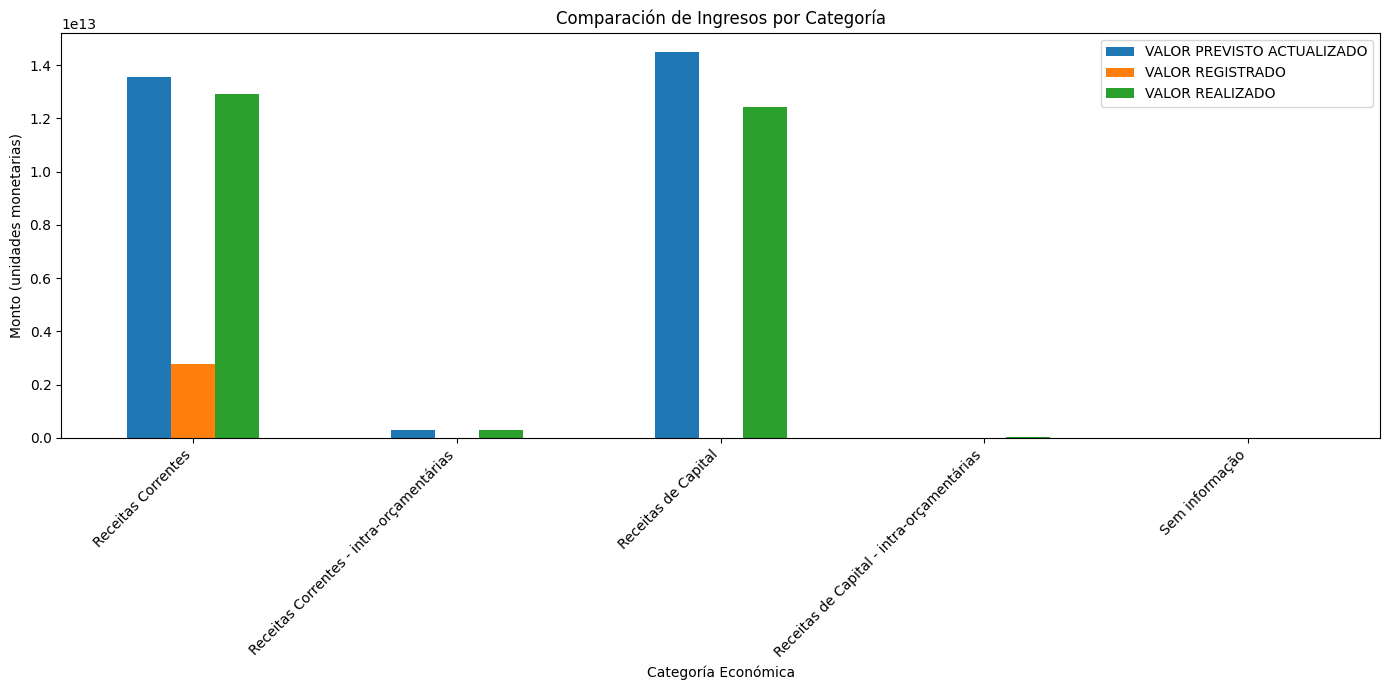

In [187]:
import matplotlib.pyplot as plt
 
# Agrupar por categoría económica y sumar los valores
grouped_data = df_datos_brasil.groupby('CATEGORÍA ECONÓMICA')[
    ['VALOR PREVISTO ACTUALIZADO', 'VALOR REGISTRADO', 'VALOR REALIZADO']
].sum().reset_index()
 
# Crear gráficos de comparación
# Gráfico de barras
plt.figure(figsize=(12, 6))
grouped_data.plot(
    x='CATEGORÍA ECONÓMICA',
    kind='bar',
    stacked=False,
    figsize=(14, 7),
    title='Comparación de Ingresos por Categoría',
    xlabel='Categoría Económica',
    ylabel='Monto (unidades monetarias)',
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En esta gráfica de barras se muestra una comparación entre los ingresos previstos, registrados y realizados por categoría económica. Se puede observar que las categorías Receitas Correntes y Receitas de Capital, que son las que representan mayor volumen de ingresos, los ingresos previstos son mayores que los ingresos realizados y registrados, lo que significa que se ha recaudado menor dinero del previsto. 

In [188]:
df_datos_brasil.head(2)

,CÓDIGO ORGANISMO SUPERIOR,NOMBRE ORGANISMO SUPERIOR,CÓDIGO ORGANISMO,NOMBRE ORGANISMO,CÓDIGO UNIDAD GESTORA,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN INGRESO,ESPECIE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR REGISTRADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA REGISTRO,AÑO EJERCICIO,MES,DIFERENCIA
0,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,2013-12-31,2013,12,-1297.13
1,63000,Advocacia-Geral da União,63000,Advocacia-Geral da União - Unidades com víncul...,110060,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,2013-12-31,2013,12,-26666621.42


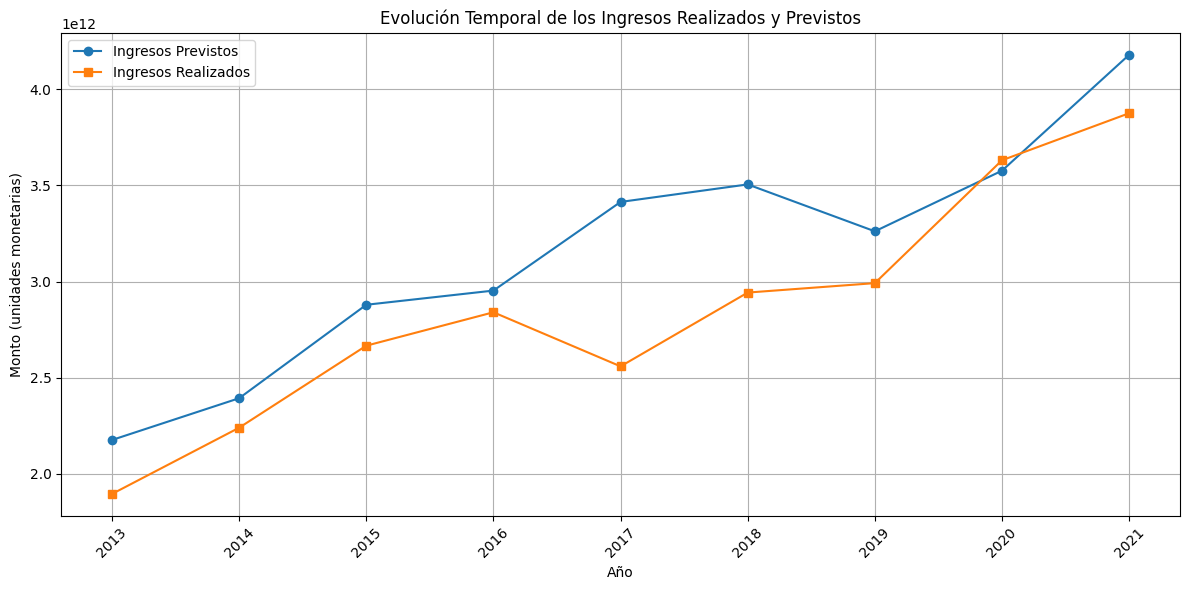

In [189]:
# Agrupar por año y sumar los ingresos realizados y previstos
temporal_data = df_datos_brasil.groupby('AÑO EJERCICIO')[['VALOR PREVISTO ACTUALIZADO', 'VALOR REALIZADO']].sum().reset_index()

# Graficar la evolución temporal
plt.figure(figsize=(12, 6))
plt.plot(temporal_data['AÑO EJERCICIO'], temporal_data['VALOR PREVISTO ACTUALIZADO'], label='Ingresos Previstos', marker='o')
plt.plot(temporal_data['AÑO EJERCICIO'], temporal_data['VALOR REALIZADO'], label='Ingresos Realizados', marker='s')
plt.title('Evolución Temporal de los Ingresos Realizados y Previstos')
plt.xlabel('Año')
plt.ylabel('Monto (unidades monetarias)')
plt.xticks(temporal_data['AÑO EJERCICIO'], rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Este gráfico de líneas representa la evolución temporal de los ingresos realizados y previstos por año. Principalmente se observa en el año 2017 un aumento de los ingresos previstos hasta 3.5 unidades monetarias frente al descenso en los ingresos realizados en el mismo año hasta los 2.5 unidades monetarias. Esta diferencia empieza a disminuir hasta el año 2020, en el cual los ingresos realizados son superiores a los ingresos previstos, alcanzando los 3.5 unidades monetarias. Por último, en 2021 los ingresos previstos alcanzan su máximo pico en casi 4.5 unidades monetarias frente a los ingresos realizados con casi 4.0 unidades monetarias. 

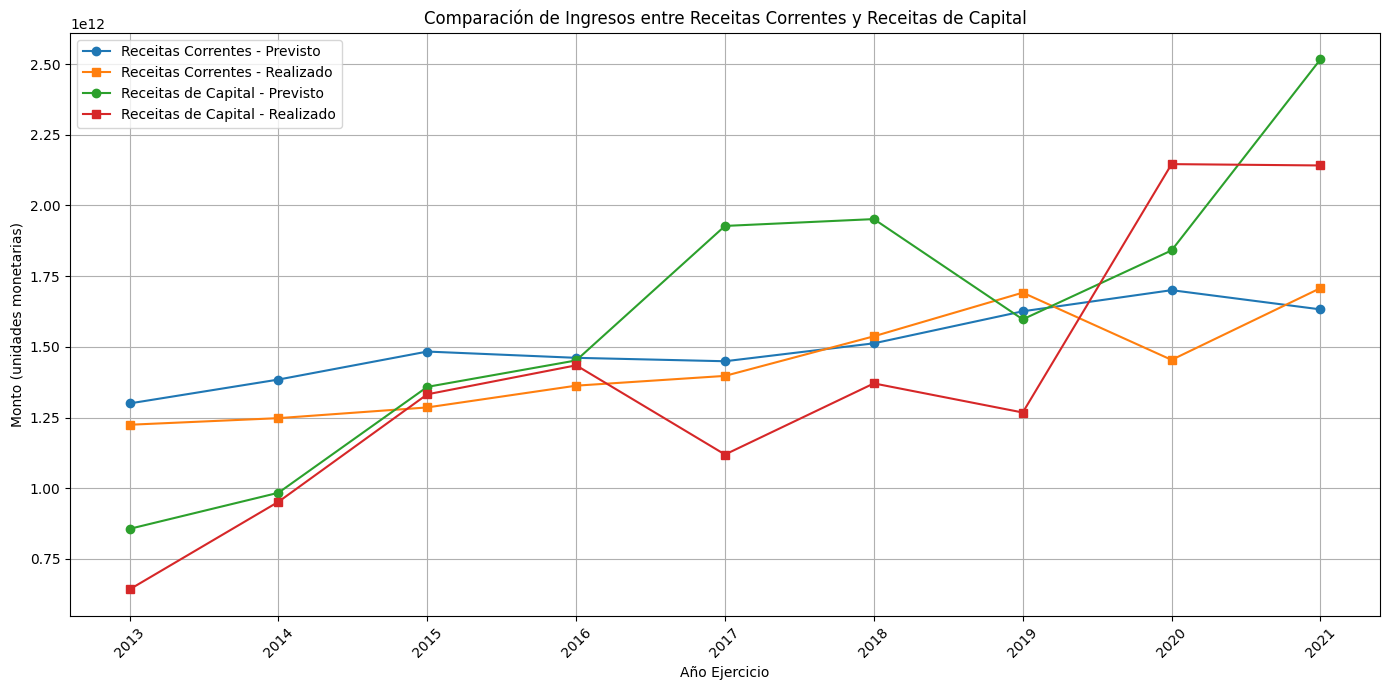

In [190]:
# Filtrar las categorías de interés
filtered_data = df_datos_brasil[df_datos_brasil['CATEGORÍA ECONÓMICA'].isin(['Receitas Correntes', 'Receitas de Capital'])]

# Agrupar por "AÑO EJERCICIO" y categoría económica
comparison_data = filtered_data.groupby(['AÑO EJERCICIO', 'CATEGORÍA ECONÓMICA'])[
    ['VALOR PREVISTO ACTUALIZADO', 'VALOR REALIZADO']
].sum().reset_index()

# Graficar la comparación
plt.figure(figsize=(14, 7))
for category in ['Receitas Correntes', 'Receitas de Capital']:
    category_data = comparison_data[comparison_data['CATEGORÍA ECONÓMICA'] == category]
    plt.plot(
        category_data['AÑO EJERCICIO'], category_data['VALOR PREVISTO ACTUALIZADO'],
        label=f'{category} - Previsto', marker='o'
    )
    plt.plot(
        category_data['AÑO EJERCICIO'], category_data['VALOR REALIZADO'],
        label=f'{category} - Realizado', marker='s'
    )

# Configuración del gráfico
plt.title('Comparación de Ingresos entre Receitas Correntes y Receitas de Capital')
plt.xlabel('Año Ejercicio')
plt.ylabel('Monto (unidades monetarias)')
plt.xticks(comparison_data['AÑO EJERCICIO'].unique(), rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

En esta gráfica de líneas se puede observar la comparación de ingresos entre las categorías económicas Receitas Correntes y Receitas de Capital por año. En Receitas Correntes los ingresos previstos (línea azul) se mantienen constantes a lo largo del tiempo, exceptuando algunos picos en los años 2019 y 2020 en los que se preveé una recaudación de casi 1.75 unidades monetarias. Por el contrario, los ingresos realizados (línea naranja) en esta categoría se puede ver que se mantienen constantes hatsa el año 2019 donde hay un pico, alcanzando una recaudación de casi 1.75 unidades monetarias. Luego en 2020 hay una disminución de los ingresos realizados y en el año 2021 vuelve a subir.
 
En la categoría económica Receitas de Capital los ingresos previstos (línea verde) aumentan exponencialmente año tras año hasta los años 2019 y 2020 donde se genera un descenso. Luego, en el año 2021 hay de nuevo una subida de los ingresos previstos alcanzando su pico máximo en los 2.50 unidades monetarias. Luego, en los ingresos realizados (línea roja) se ve que en los primeros años los ingresos recaudados suben exponencialamente hasta el 2017 donde hay una bajada bastante significativa y que entra en contradicción con los ingresos que se habían previsto. Luego, en el año 2020 los ingresos realizados superan a los ingresos previstos, manteniéndose constante hasta el año 2021. Sin embargo, los ingresos previstos sí que suben exponencialmente en el año 2021, alcanzando su pico máximo en 2.50 unidades monetarias. 

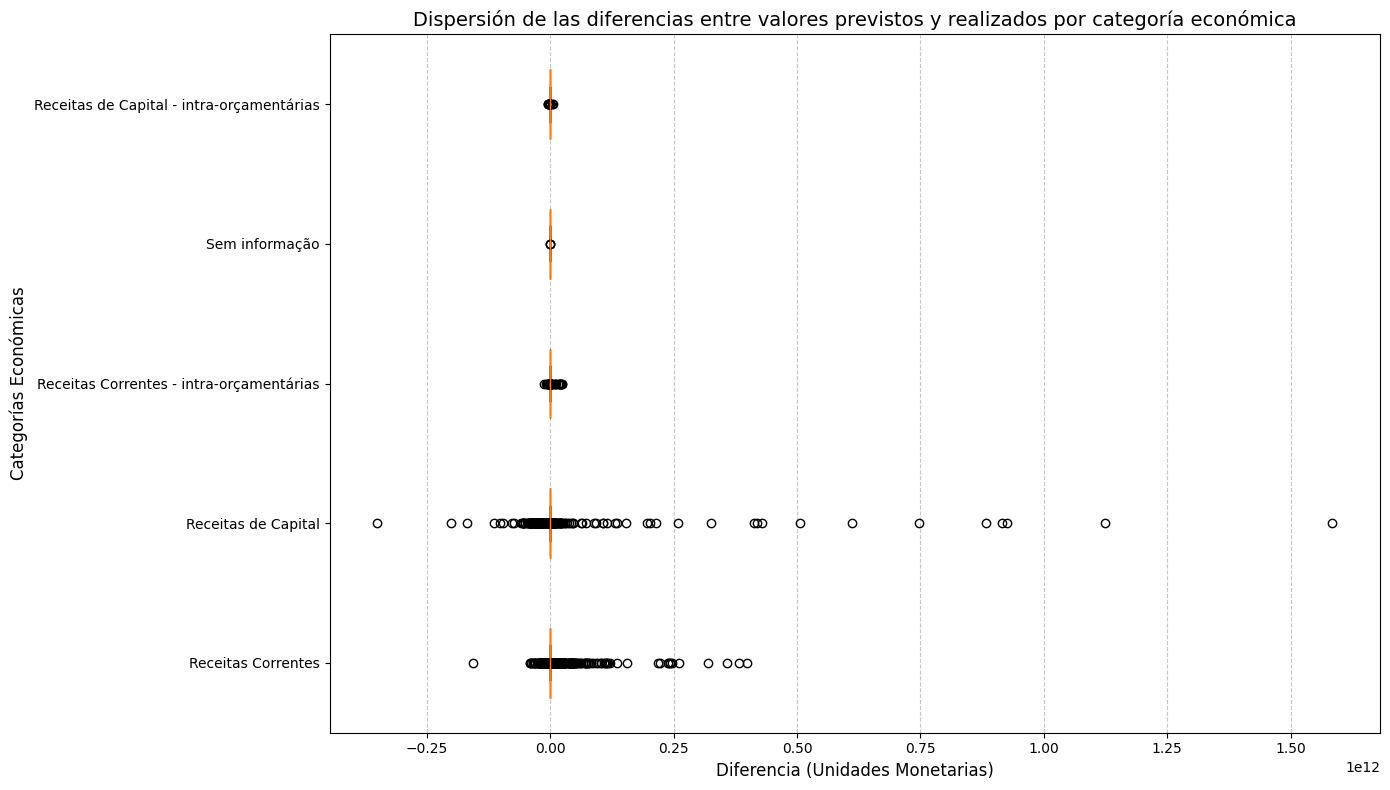

In [191]:
# Calcular las diferencias entre los valores previstos y realizados
df_datos_brasil['DIFERENCIA'] = df_datos_brasil['VALOR PREVISTO ACTUALIZADO'] - df_datos_brasil['VALOR REALIZADO']

# Preparar los datos para el diagrama de caja
categorias = df_datos_brasil['CATEGORÍA ECONÓMICA'].unique()
diferencias = [df_datos_brasil.loc[df_datos_brasil['CATEGORÍA ECONÓMICA'] == categoria, 'DIFERENCIA'].dropna() for categoria in categorias]

# Crear el diagrama de caja
plt.figure(figsize=(14, 8))
plt.boxplot(diferencias, tick_labels=categorias, vert=False, patch_artist=True)

# Configuración del gráfico
plt.title('Dispersión de las diferencias entre valores previstos y realizados por categoría económica', fontsize=14)
plt.xlabel('Diferencia (Unidades Monetarias)', fontsize=12)
plt.ylabel('Categorías Económicas', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En esta gráfica de diagrama de cajas se puede apreciar la dispersión de las diferencias entre valores previstos y realizados por categoría económica. En las tres primeras categorías que se observan en el eje de ordenadas (Y) la dispersión en los ingresos es mínima, no se observan valores atípicos. Esto se debe fundamentalmente a que estas categorías económicas son las que menos cuentan en la participación de los ingfresos de Brasil. 
 
Luego, en Receitas de Capital se observa una gran dispersión ya que representan valores muy alejados de la mediana. Destaca un valor atípico en el que hay una diferencia entre los ingresos previstos y realizados de más de 1.50 unidades monetarias. 
 
En Receitas Correntes se puede ver que existe dispersión entre los ingresos al igual que en Receitas de Capital. Destaca un valor atípico en el que hay una diferencia entre los ingresos previstos y realizados entorno a los -0,25 unidades monetarias, lo cual significa que se han recaudado más ingresos de los esperados. 

## Fase 5: Conclusiones y Recomendaciones

1. **Resumen de Hallazgos:**

   - Identificar las categorías y períodos con mayor discrepancia entre lo previsto y lo realizado.

   - Describir tendencias observadas en la ejecución de ingresos.

2. **Propuestas de Mejora:**
   - Sugerir acciones para mejorar la precisión en la planificación y ejecución de los ingresos.

# 1. Resumen de Hallazgos
 
Tras analizar los datos, se han encontrado los siguientes hallazgos:
 
- Las categorías económicas con mayor discrepancia entre los ingresos previstos y realizados son Receitas de Capital y Receitas Correntes. En la gráfica de Comparación de ingresos por categoría se ha podido ver que ambas categorías recaudan menos dinero del previsto. Luego, en la gráfica de Comparación de ingresos entre Receitas Correntes y Receitas de Capital se ha obervado que las previsiones y recaudaciones han cambiado a lo largo de los años. En Receitas Correntes en el año 2020 los ingresos previstos son mayores que los realizados, y en el año 2021 los ingresos realizados son mayores que los previstos. En cambio, en Receitas de Capital en el año 2020 los ingresos realizados son mayores que los previstos, y en el año 2021 los ingresos previstos son mayores que los realizados. Por tanto, en las dos categorías económicas hay una tendencia temporal totalmente distinta. 

- En la gráfica de Evolución temporal de los ingresos realizados y previstos se pueden sacar dos conclusiones: En el año 2017 se encuentra la mayor diferencia entre ingresos previstos y realizados, año en el cual hay una subida exponencial de los ingresos previstos y una bajada al mismo tiempo de los ingresos realizados. Luego, en el año 2020 es el único año donde los ingresos realizados superan a los previstos. Ya en el año 2021 la tendencia se revierte.

A continuación se dan algunas posibles explicaciones o causas a los patrones encontrados:
 
1. Discrepancias entre ingresos previstos y realizados en Receitas Correntes y Receitas de Capital
Causas generales de discrepancias:
- Errores de estimación: Las proyecciones de ingresos suelen basarse en tendencias económicas, marcos legales o esperados cambios macroeconómicos. En años de incertidumbre o cambios rápidos, las estimaciones pueden no coincidir con la realidad.

- Impacto de la pandemia: Entre 2020 y 2021, la pandemia de COVID-19 afectó los flujos de ingresos en muchos sectores. Esto pudo causar las discrepancias observadas.

Tendencias opuestas entre las dos categorías:
- En Receitas Correntes, los ingresos realizados superaron a los previstos en 2021. Esto podría deberse a:
  - Mayor eficiencia en la recaudación de impuestos recurrentes.
  - Políticas económicas que impulsaron la base gravable, como el consumo o el empleo.
  - En Receitas de Capital, los ingresos realizados superaron a los previstos en 2020, pero esta tendencia se invirtió en 2021. Esto podría explicarse por:
    - Año 2020: La venta de activos o concesiones extraordinarias pudo generar más ingresos de lo anticipado.
    - Año 2021: Las estimaciones optimistas para ingresos de capital no se concretaron, posiblemente debido a obstáculos en proyectos de inversión o licitaciones.

2. Mayor diferencia entre ingresos previstos y realizados en 2017

- Incremento exponencial en los ingresos previstos:
  - Políticas ambiciosas: En 2017, pudo haberse establecido un presupuesto con metas extremadamente optimistas, impulsado por:
    - Necesidad de compensar déficits fiscales previos.
    - Proyecciones económicas sobrestimadas.
  - Factores macroeconómicos: Podría haber habido expectativas de crecimiento económico que no se materializaron.
  - Baja en los ingresos realizados:
  - Crisis económica: Si hubo una recesión o bajo rendimiento económico, los ingresos esperados simplemente no se lograron.
  - Fallas en la implementación: Problemas administrativos o cambios legislativos pudieron retrasar la entrada de ingresos.
 
3. Año 2020: Único año donde los ingresos realizados superan los previstos
- Este comportamiento inusual puede atribuirse a:
  - Medidas de emergencia: Durante la pandemia, los gobiernos recurrieron a medidas excepcionales como el cobro de multas, recuperación de deudas o ventas de activos para cubrir déficits.
  - Subestimación en las previsiones: Dada la incertidumbre inicial, las proyecciones para 2020 pudieron ser conservadoras, mientras que las acciones tomadas durante el año generaron ingresos adicionales.
 
4. Reversión en 2021 (ingresos previstos superan a los realizados)
- Este cambio refleja:
  - Optimismo excesivo en las previsiones: Al tratar de recuperarse de 2020, las estimaciones para 2021 pudieron basarse en un retorno acelerado a la normalidad económica, lo que no siempre ocurre.
  - Restricciones operativas: Las unidades gestoras pudieron enfrentar desafíos como falta de recursos, restricciones presupuestarias o atrasos en la implementación de políticas.

# 2. Propuestas de mejora

1. Mejorar las herramientas de análisis y proyección
- Uso de modelos predictivos avanzados:
  - Emplear técnicas de inteligencia artificial y machine learning para analizar patrones históricos y prever ingresos con mayor precisión.
  - Considerar factores externos como fluctuaciones económicas, cambios legislativos y eventos globales (ej. pandemias).

2. Crear sistemas de monitoreo continuo
- Indicadores clave de rendimiento (KPI):
  - Establecer KPIs específicos para cada unidad gestora, como el porcentaje de ejecución mensual o trimestral.
  - Automatizar alertas para identificar a tiempo desviaciones entre ingresos previstos y realizados.

3. Innovar en los métodos de recaudación
- Digitalización de procesos:
  - Automatizar el cobro de ingresos y multas para reducir errores y mejorar la eficiencia.
  - Nuevas estrategias de recaudación:
  - Explorar fuentes adicionales de ingresos, como concesiones o alianzas público-privadas, para diversificar los flujos.